<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [258]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [259]:
url = "C:/Users/johnn/OneDrive/Documentos/Machine Learning/Alura/Regressão Linear/Dados/Consumo_cerveja.csv"

dados = pd.read_csv(url, sep=';')

## Visualizar os dados

In [260]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificando o tamanho do dataset

In [261]:
dados.shape

(365, 7)

In [262]:
dados.data = pd.to_datetime(dados.data, format='%d/%m/%Y')

In [263]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        365 non-null    datetime64[ns]
 1   temp_media  365 non-null    float64       
 2   temp_min    365 non-null    float64       
 3   temp_max    365 non-null    float64       
 4   chuva       365 non-null    float64       
 5   fds         365 non-null    int64         
 6   consumo     365 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 20.1 KB


# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [264]:
dados.iloc[:, 1:].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
temp_media,365.0,21.23,3.18,12.9,19.02,21.38,23.28,28.86
temp_min,365.0,17.46,2.83,10.6,15.30,17.90,19.60,24.50
temp_max,365.0,26.61,4.32,14.5,23.80,26.90,29.40,36.50
chuva,365.0,5.20,12.42,0.0,0.00,0.00,3.20,94.80
fds,365.0,0.28,0.45,0.0,0.00,0.00,1.00,1.00
consumo,365.0,25401.37,4399.14,14343.0,22008.00,24867.00,28631.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [265]:
correlacao = dados.corr()

plt.figure(figsize=(10,6))
plt.title('Correlação do dataset', fontsize=16, loc='left', y=1.02, c='b')
sns.heatmap(correlacao, fmt='.2f', annot=True, cmap='crest')


TypeError: 'str' object is not callable

<Figure size 1000x600 with 0 Axes>

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de cerveja ao ano', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax.set_ylabel('Dias', fontsize=14)
ax = plt.plot(dados.data, dados.consumo)

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.set_style(style='darkgrid')

ax.set_title('Temperatura média', fontsize=16)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('Temperatura média', fontsize=14)

ax = plt.plot(dados.data, dados.temp_media)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [ ]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

In [ ]:
ax = sns.boxplot(dados.consumo, orient='h', width=0.4)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Litros')
ax.set_title('Consumo de cerveja');

In [ ]:
sns.boxplot(dados.drop('consumo',axis=1), orient='h')

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

In [ ]:
ax = sns.boxplot(data=dados, x='consumo', y='fds', orient='h', width=0.4)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Litros')
ax.set_ylabel('Fim de semana')

ax.set_title('Consumo de cerveja');

In [ ]:
dados.query('consumo > 33500 & fds == 0').sort_values(by='consumo', ascending=False)

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [ ]:
sns.set_palette(palette='Accent')

In [ ]:
sns.set_style('darkgrid')

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

In [ ]:
ax = sns.distplot(dados.consumo,kde=True)
ax.figure.set_size_inches(12,4)
ax.set_title('Distribuição de Frequências', fontsize=18)
ax.set_xlabel('Consumo')
ax.set_ylabel('Consumo de cerveja(Litros)');

In [ ]:
from scipy.stats import shapiro

_, p = shapiro(dados.consumo)
alpha = 0.05

In [ ]:
if p < 0.05:
    print('não é uma distribuição normal')
else:
    print('é uma distribuição normal')

In [ ]:
from scipy.stats import normaltest

In [ ]:
_, p = normaltest(dados.consumo)
if p < 0.05:
    print(f'{p:.2f} não é uma distribuição normal')
else:
    print('é uma distribuição normal')

In [ ]:
from scipy.stats import anderson

In [ ]:
anderson(dados.consumo, dist='norm')
sns.displot([15. , 10. ,  5. ,  2.5,  1. ])

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

In [ ]:
ax = sns.pairplot(dados)


## Plotando o pairplot fixando somente uma variável no eixo y

In [ ]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=dados.drop('consumo',axis=1))
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.08);

In [ ]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=dados.drop(['consumo','data'],axis=1),kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=20, y=1.08);

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

In [ ]:
ax = sns.jointplot(data=dados, x=dados.consumo, y=dados.temp_max);

## Plotando um jointplot com a reta de regressão estimada

In [ ]:
ax = sns.jointplot(data=dados, x=dados.consumo, y=dados.temp_max, kind='reg');
ax.fig.suptitle('Consumo x Temperatura', y=1.02)
ax.set_axis_labels('Temperatura média', 'Consumo de Cerveja');

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

In [ ]:
ax = sns.lmplot(data=dados, x='temp_max', y='consumo');
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxima ºC', fontsize=12)
ax.set_ylabels('Consumo', fontsize=12)

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

In [ ]:
ax = sns.lmplot(data=dados, x='temp_max', y='consumo', hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxima ºC', fontsize=12)
ax.set_ylabels('Consumo', fontsize=12)
ax.add_legend(title='Fim de Semana');

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

In [ ]:
ax = sns.lmplot(data=dados, x='temp_max', y='consumo', col='fds')
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxima ºC', fontsize=12)
ax.set_ylabels('Consumo', fontsize=12);

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [ ]:
y = dados.consumo

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
X = dados[['temp_max', 'chuva', 'fds']]
X

## Criando os datasets de treino e de teste

In [270]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [271]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((255, 3), (110, 3), (255,), (110,))

In [272]:
X_treino

,temp_max,chuva,fds
195,27.6,0.0,0
344,30.3,0.0,0
288,35.7,0.0,0
59,26.3,3.0,1
220,26.2,0.0,1
...,...,...,...
73,26.8,0.3,1
68,26.9,9.7,0
215,27.4,0.0,0
341,28.0,0.0,0


In [273]:
X_teste

,temp_max,chuva,fds
5,30.5,12.2,0
83,27.9,0.0,0
40,29.0,32.2,0
143,26.3,0.0,1
193,28.7,0.0,0
...,...,...,...
46,27.3,22.7,0
229,26.5,0.0,0
45,27.6,17.4,1
329,27.4,0.0,0


In [274]:
y_treino

195    28742
344    30740
288    27387
59     27475
220    33517
       ...  
73     32872
68     23042
215    27724
341    27713
84     27989
Name: consumo, Length: 255, dtype: int64

In [275]:
y_teste

5      28218
83     22401
40     21137
143    31387
193    25640
       ...  
46     25343
229    23070
45     24968
329    25285
203    19029
Name: consumo, Length: 110, dtype: int64

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [277]:
reg = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [278]:
reg.fit(X_treino, y_treino)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [279]:
print(f'R² = {reg.score(X_teste, y_teste)}')

R² = 0.690736466775069


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [280]:
previsoes = reg.predict(X_teste)
previsoes

array([26094.90177526, 25056.13191497, 23852.14792684, 29361.63643926,
       25603.92132216, 28890.65776528, 20484.03383301, 28965.58342859,
       21023.87627737, 29575.39452427, 28342.86835809, 28548.28938579,
       25321.09612517, 22225.89320436, 20544.69824707, 30719.97303089,
       23275.81634161, 26634.25245434, 29430.11011516, 19920.60622259,
       23274.57708862, 23070.39531392, 17226.09529035, 20676.55088589,
       25595.58426485, 25530.98239956, 21285.12272857, 25809.34234985,
       21894.18633654, 27863.55262681, 22600.85923454, 23823.97949265,
       23960.5531006 , 20057.55357439, 29361.63643926, 23823.6057488 ,
       31347.37304031, 22909.13498792, 25809.34234985, 31172.22520894,
       31895.1624475 , 22842.27430887, 25193.07926677, 25457.31566882,
       27110.34219192, 30699.85323034, 25261.55294267, 30920.65673884,
       28274.3946822 , 20536.86930568, 31895.1624475 , 26220.18440524,
       34154.79375215, 19843.20205329, 26151.71072935, 27932.0263027 ,
      

In [281]:
y_teste.ravel()

array([28218, 22401, 21137, 31387, 25640, 28972, 20238, 24886, 23243,
       26311, 29569, 33930, 22922, 22821, 23134, 29265, 25142, 26805,
       32713, 20680, 22741, 24222, 20016, 23065, 24227, 29972, 21662,
       22446, 19525, 31139, 20738, 24097, 21617, 18448, 28049, 28405,
       32666, 25119, 23849, 26836, 31088, 21062, 22610, 28397, 29130,
       30127, 24567, 29926, 30329, 21073, 27518, 26249, 34695, 21092,
       24146, 24219, 23210, 26275, 25479, 28893, 21029, 17939, 20903,
       27657, 30392, 27042, 19950, 26272, 24862, 37937, 17287, 29579,
       31108, 28647, 22409, 25867, 26594, 24867, 24679, 19640, 19849,
       16977, 26362, 29760, 26075, 26241, 26964, 28900, 30814, 24227,
       16748, 24726, 22933, 23537, 28348, 20740, 30345, 28610, 23937,
       19052, 33330, 22116, 22375, 30471, 21689, 25343, 23070, 24968,
       25285, 19029], dtype=int64)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [282]:
metrics.r2_score(y_teste, previsoes)

0.690736466775069

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [286]:
entrada = X_teste[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [287]:
reg.predict(entrada)

array([26094.90177526])

## Criando um simulador simples

In [294]:
temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]

print(f'{reg.predict(entrada)[0]:.2f} litros.')

38742.53 litros.


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [295]:
reg.intercept_

5951.976339312445

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [298]:
reg.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [299]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [300]:
index = ['Itercept', 'Temperatura Máxima', 'Chuva (mm)', 'Fim de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [302]:
pd.DataFrame(data=np.append(reg.intercept_, reg.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Itercept,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Fim de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [305]:
y_pred_train = reg.predict(X_treino)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

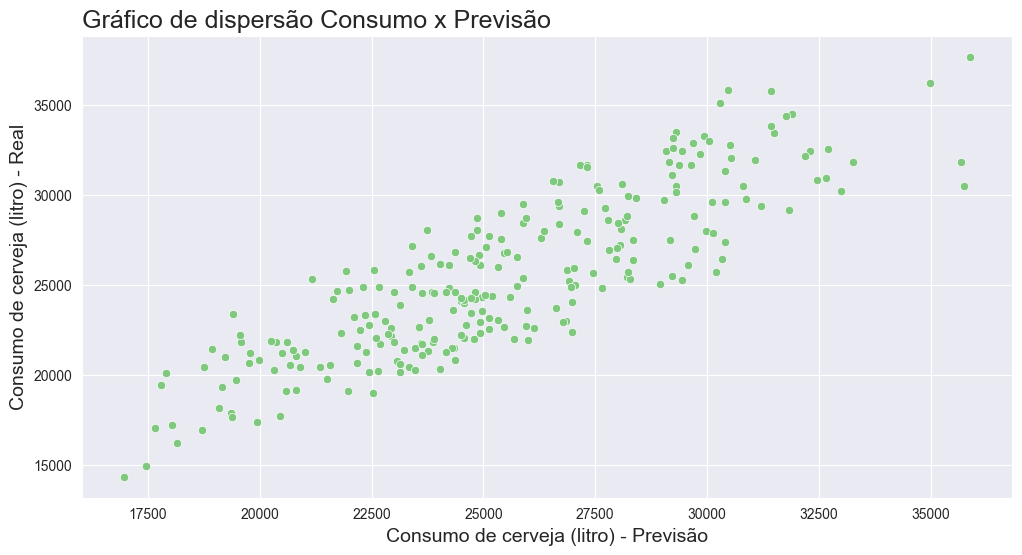

In [317]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x=y_pred_train, y=y_treino)
ax.set_title('Gráfico de dispersão Consumo x Previsão', fontsize=18, loc='left')
ax.set_xlabel('Consumo de cerveja (litro) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de cerveja (litro) - Real', fontsize=14);

## Obtendo os resíduos

In [323]:
residuos = y_treino - y_pred_train
residuos

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

# Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<Axes: ylabel='consumo'>

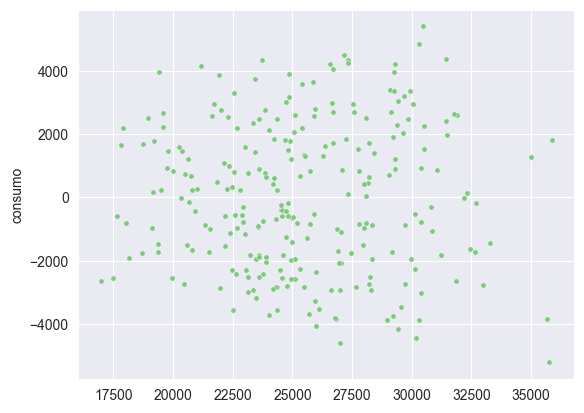

In [325]:
sns.scatterplot(x=y_pred_train, y=residuos, s=15)

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<Axes: ylabel='consumo'>

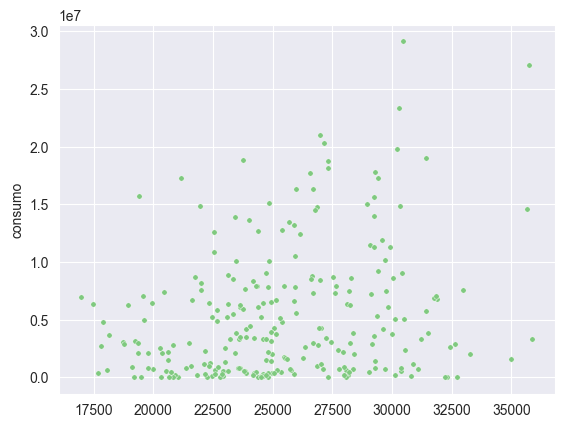

In [327]:
sns.scatterplot(x=y_pred_train, y=residuos**2, s=15)

## Plotando a distribuição de frequências dos resíduos

<Axes: xlabel='consumo', ylabel='Density'>

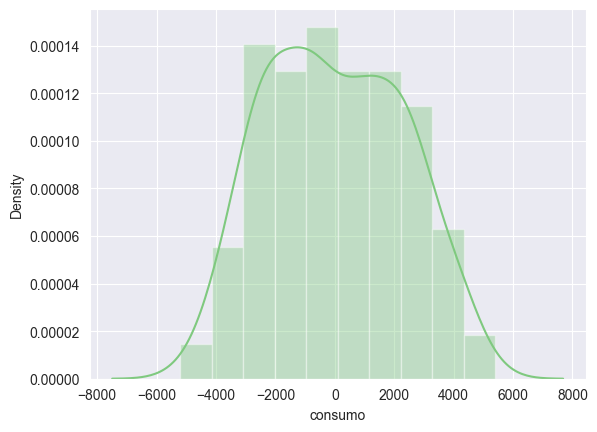

In [329]:
sns.distplot(residuos)

In [331]:
from scipy.stats import shapiro

_, p = shapiro(residuos)
alpha = 0.05
if p < alpha:
    print('Não é uma distribuição normal')
else:
    print('É uma distribuição normal')    

Não é uma distribuição normal


# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [333]:
X2 = dados[['temp_media', 'fds', 'chuva']]

## Criando os datasets de treino e de teste

In [335]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [336]:
regressor_linear = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [337]:
regressor_linear.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [339]:
regressor_linear.score(X2_train, y2_train)

0.6617640611940381

## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [342]:
pred2 = regressor_linear.predict(X2_test)
pred = reg.predict(X_teste)

pred,pred2

(array([26094.90177526, 25056.13191497, 23852.14792684, 29361.63643926,
        25603.92132216, 28890.65776528, 20484.03383301, 28965.58342859,
        21023.87627737, 29575.39452427, 28342.86835809, 28548.28938579,
        25321.09612517, 22225.89320436, 20544.69824707, 30719.97303089,
        23275.81634161, 26634.25245434, 29430.11011516, 19920.60622259,
        23274.57708862, 23070.39531392, 17226.09529035, 20676.55088589,
        25595.58426485, 25530.98239956, 21285.12272857, 25809.34234985,
        21894.18633654, 27863.55262681, 22600.85923454, 23823.97949265,
        23960.5531006 , 20057.55357439, 29361.63643926, 23823.6057488 ,
        31347.37304031, 22909.13498792, 25809.34234985, 31172.22520894,
        31895.1624475 , 22842.27430887, 25193.07926677, 25457.31566882,
        27110.34219192, 30699.85323034, 25261.55294267, 30920.65673884,
        28274.3946822 , 20536.86930568, 31895.1624475 , 26220.18440524,
        34154.79375215, 19843.20205329, 26151.71072935, 27932.02

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [346]:
print('Modelo com temp. média')
print(f'R²: {metrics.r2_score(y2_test, pred2).round(2)}')

Modelo com temp. média
R²: 0.66


In [347]:
print('Modelo com temp. máx')
print(f'R²: {metrics.r2_score(y_test, previsoes).round(2)}')

Modelo com temp. máx
R²: 0.69


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [368]:
EQM_2 = metrics.mean_squared_error(y2_test, pred2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, pred2)).round(2)
ABSE_2 = metrics.mean_absolute_error(y2_test, pred2).round(2)
R2_2 = metrics.r2_score(y2_test, pred2).round(2)

pd.DataFrame(data=[R2_2, EQM_2, REQM_2, ABSE_2], index=['R²_2','EQM_2', 'REQM_2', 'ABSE_2'], columns=['Valores'])

,Valores
R²_2,0.66
EQM_2,6060775.46
REQM_2,2461.86
ABSE_2,2068.99


## Obtendo métricas para o modelo com Temperatura Máxima

In [366]:
EQM = metrics.mean_squared_error(y_teste, previsoes).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_teste, previsoes)).round(2)
ABSE = metrics.mean_absolute_error(y_teste, previsoes).round(2)
R2 = metrics.r2_score(y_teste, previsoes).round(2)

pd.DataFrame(data=[R2, EQM, REQM, ABSE], index=['R²_2','EQM_2', 'REQM_2', 'ABSE'], columns=['Valores'])

,Valores
R²_2,0.69
EQM_2,5471976.38
REQM_2,2339.23
ABSE,1966.56


In [352]:
metrics.mean_absolute_error(y_test, previsoes)

1966.5560392257598

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [369]:
X_test[0:1]

,temp_media,fds,chuva
5,23.78,0,12.2


In [370]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [378]:
reg.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [377]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print(f'{reg.predict(entrada)} litros.')

[26094.90177526] litros.


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [379]:
import pickle

In [380]:
with open('modelo_consumo_cerveja.pkl', 'wb') as f:
    pickle.dump(reg, f)

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```

In [381]:
import pickle

In [382]:
with open('modelo_consumo_cerveja.pkl', 'rb') as f:
    modelo = pickle.load(f)

In [383]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print(f'{modelo.predict(entrada)}')

[26094.90177526]
